<p><b>Churn rate</b> is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:</p>

<p>User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.</p>

<h2>Task</h2>
Your task is to predict the churn score for a website based on the features provided in the dataset.

<h2>Data description</h2>
The dataset folder contains the following files:

train.csv: 36992 x 25<br>
test.csv: 19919 x 24


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

In [2]:
train = pd.read_csv("../input/churn-rate-prediction/train.csv")
test = pd.read_csv("../input/churn-rate-prediction/test.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
train.shape

(36992, 25)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [8]:
train.describe(include='O')

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe43004900440036003000340032003000,Alanna Lemoine,F,B17TMIG,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


#### Used to describe the categorical columns

# EDA

## Numerical data

In [9]:
num_features = [feature for feature in train.columns if train[feature].dtype !='O']
num_features

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'points_in_wallet',
 'churn_risk_score']

So here we have a list of all our numerical features 

In [10]:
for feature in num_features:
    print(f"{feature} has {train[feature].isnull().sum()/len(train[feature])*100} percent null values\n")

age has 0.0 percent null values

days_since_last_login has 0.0 percent null values

avg_time_spent has 0.0 percent null values

avg_transaction_value has 0.0 percent null values

points_in_wallet has 9.307417820069205 percent null values

churn_risk_score has 0.0 percent null values



So we can observe that on points_in_wallet feature has null values

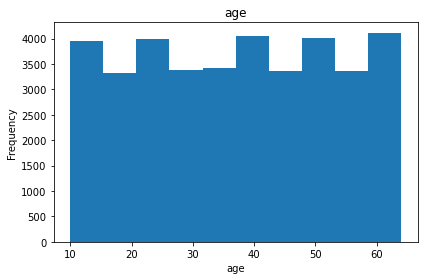

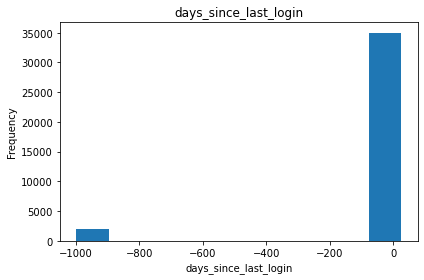

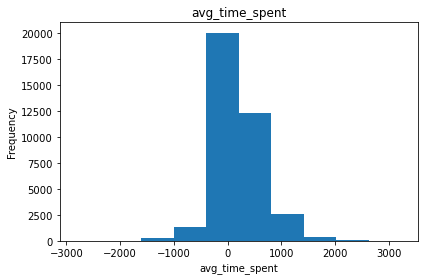

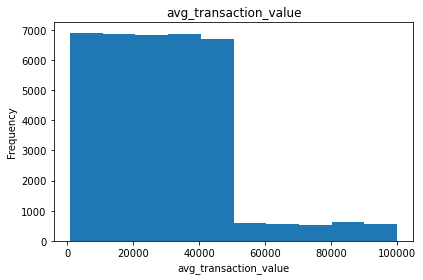

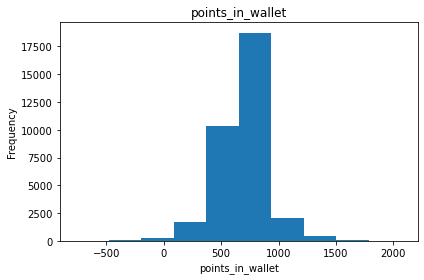

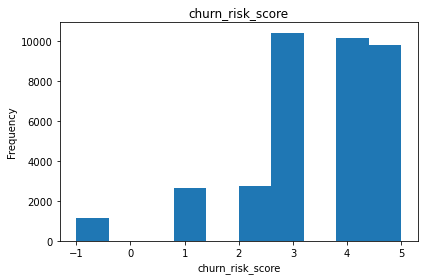

In [11]:
for feature in num_features:
    train[feature].plot.hist()
    plt.xlabel(feature)
    plt.title(feature)
    plt.tight_layout()
    plt.show()

### We observe that:
Only two features viz avg_time_spend and points_in_wallet have a normal distribution

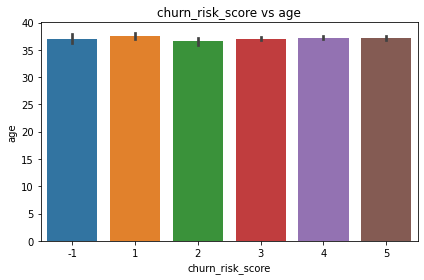

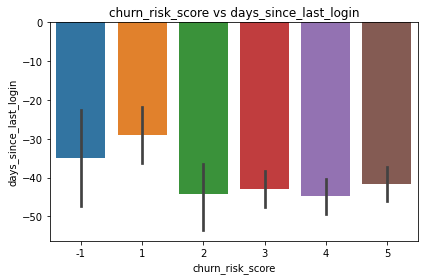

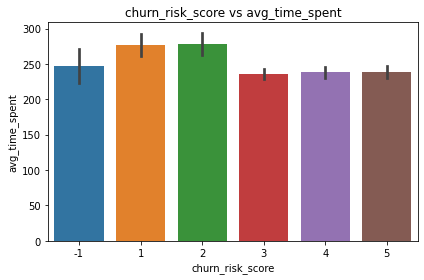

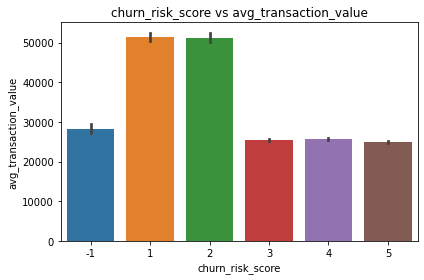

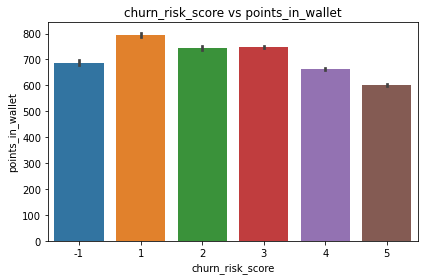

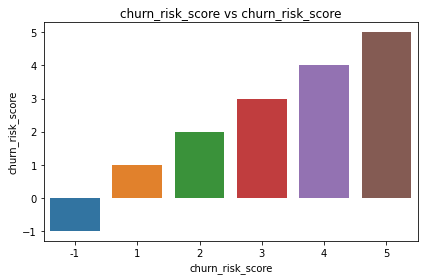

In [12]:
for feature in num_features:
    sns.barplot(y=feature,x='churn_risk_score',data=train)
    plt.ylabel(feature)
    plt.xlabel('churn_risk_score')
    plt.title('churn_risk_score vs '+feature)
    plt.tight_layout()
    plt.show()

### It is observed that:
All the numerical values are affecting the churn_risk_score

Now lets check for outliers

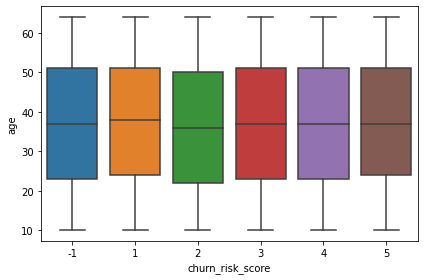

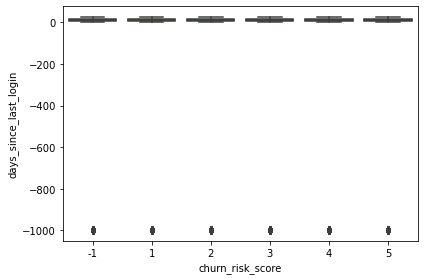

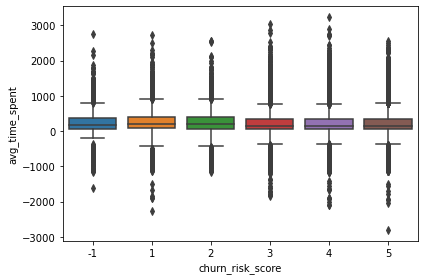

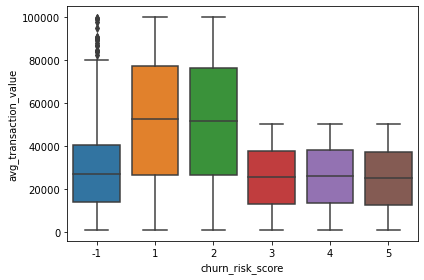

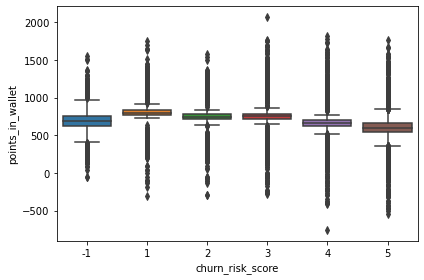

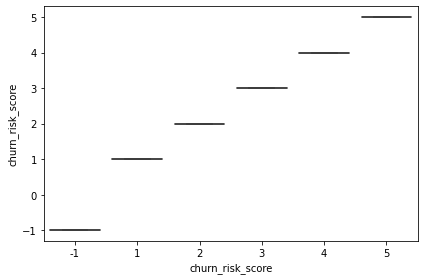

In [13]:
for feature in num_features:
    sns.boxplot(x='churn_risk_score',y=feature,data=train)
    plt.xlabel('churn_risk_score')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### We observe the following:
1. avg_time_spent and points_in_wallet have high number of outliers (will be delt with in feature engineering)
2. avg_transaction_value has more outliers only for churn_risk_score -1.

## Categorical features

In [14]:
cat_features = [feature for feature in train.columns if train[feature].dtype=='O']
cat_features

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [15]:
for feature in cat_features:
    print(f"{feature} has {train[feature].isnull().sum()/len(train[feature]*100)} percent nan values")

customer_id has 0.0 percent nan values
Name has 0.0 percent nan values
gender has 0.0 percent nan values
security_no has 0.0 percent nan values
region_category has 0.14673442906574394 percent nan values
membership_category has 0.0 percent nan values
joining_date has 0.0 percent nan values
joined_through_referral has 0.0 percent nan values
referral_id has 0.0 percent nan values
preferred_offer_types has 0.007785467128027681 percent nan values
medium_of_operation has 0.0 percent nan values
internet_option has 0.0 percent nan values
last_visit_time has 0.0 percent nan values
avg_frequency_login_days has 0.0 percent nan values
used_special_discount has 0.0 percent nan values
offer_application_preference has 0.0 percent nan values
past_complaint has 0.0 percent nan values
complaint_status has 0.0 percent nan values
feedback has 0.0 percent nan values


### We can observe that:
1. region_category
2. preferred_offer_types<br> 
have nan values

In [16]:
for feature in cat_features:
    print(f"{feature} has {train[feature].nunique()} unique values")

customer_id has 36992 unique values
Name has 36992 unique values
gender has 3 unique values
security_no has 36992 unique values
region_category has 3 unique values
membership_category has 6 unique values
joining_date has 1096 unique values
joined_through_referral has 3 unique values
referral_id has 11359 unique values
preferred_offer_types has 3 unique values
medium_of_operation has 4 unique values
internet_option has 3 unique values
last_visit_time has 30101 unique values
avg_frequency_login_days has 1654 unique values
used_special_discount has 2 unique values
offer_application_preference has 2 unique values
past_complaint has 2 unique values
complaint_status has 5 unique values
feedback has 9 unique values


Most of the categorical features have large number of unique values so we will filter them by keeping a threshold
for unique values and then visualize

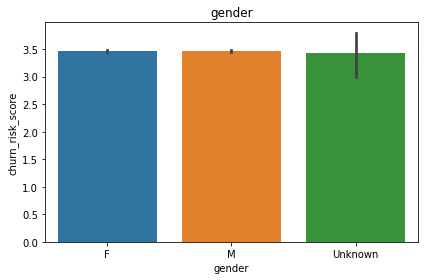

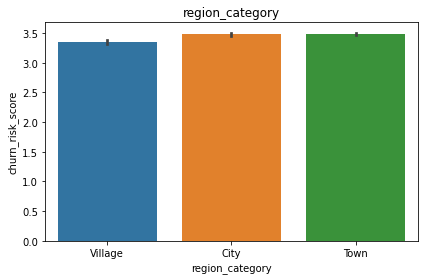

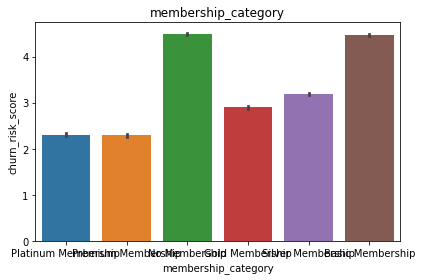

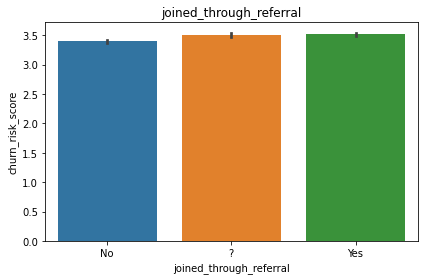

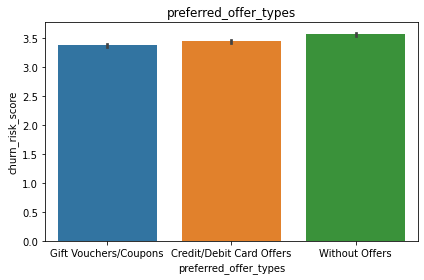

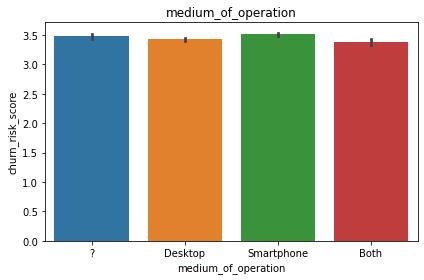

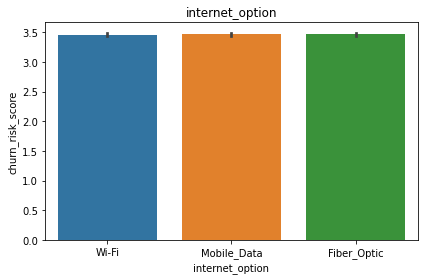

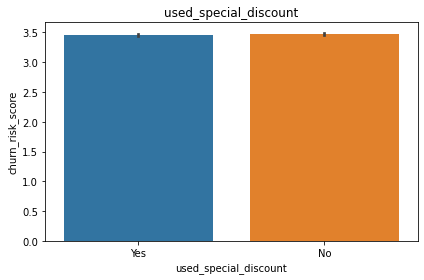

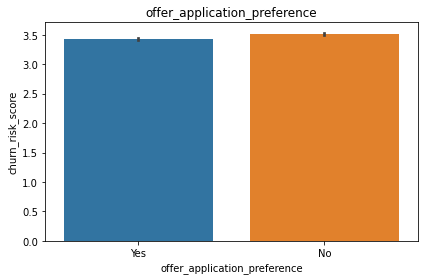

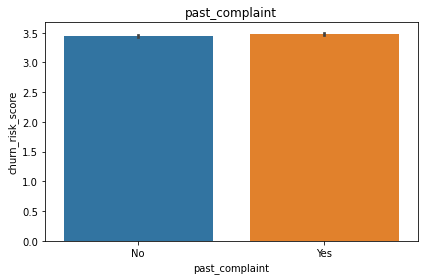

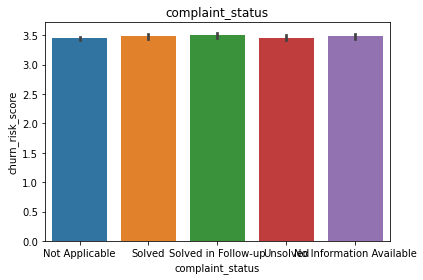

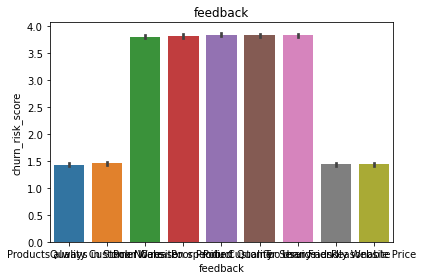

In [17]:
for feature in cat_features:
    if train[feature].nunique()<10:
        sns.barplot(x=feature,y='churn_risk_score',data=train)
        plt.xlabel(feature)
        plt.ylabel('churn_risk_score')
        plt.title(feature)
        plt.tight_layout()
        plt.show()

As feedback and membership_category features cannot be interpretted well here let's visualize them seperately

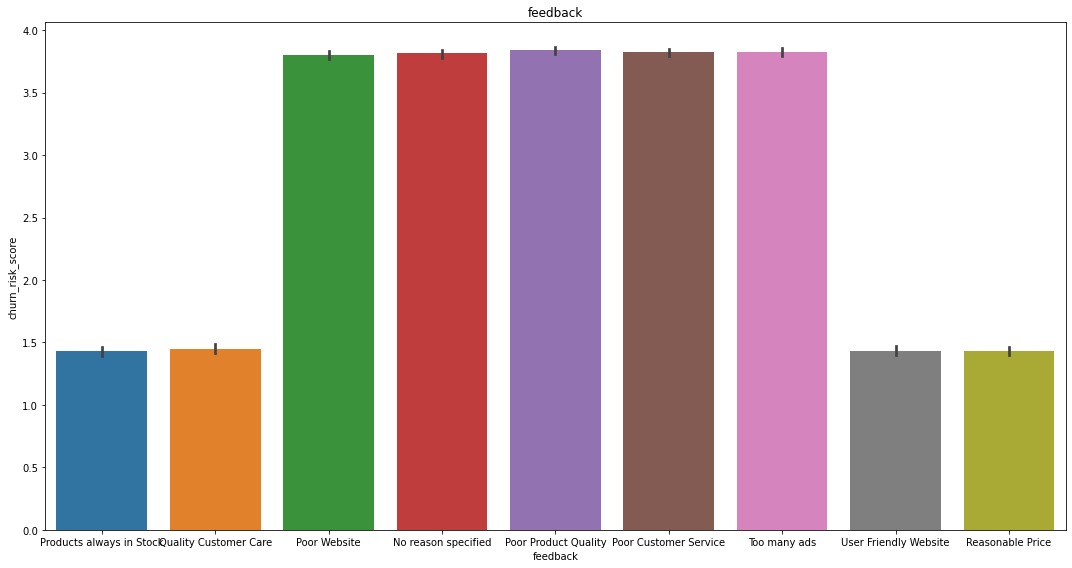

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='feedback',y='churn_risk_score',data=train)
plt.xlabel(feature)
plt.ylabel('churn_risk_score')
plt.title(feature)
plt.tight_layout()
plt.show()

Here we can observe that if the feedback is positive the churn_risk_score is less

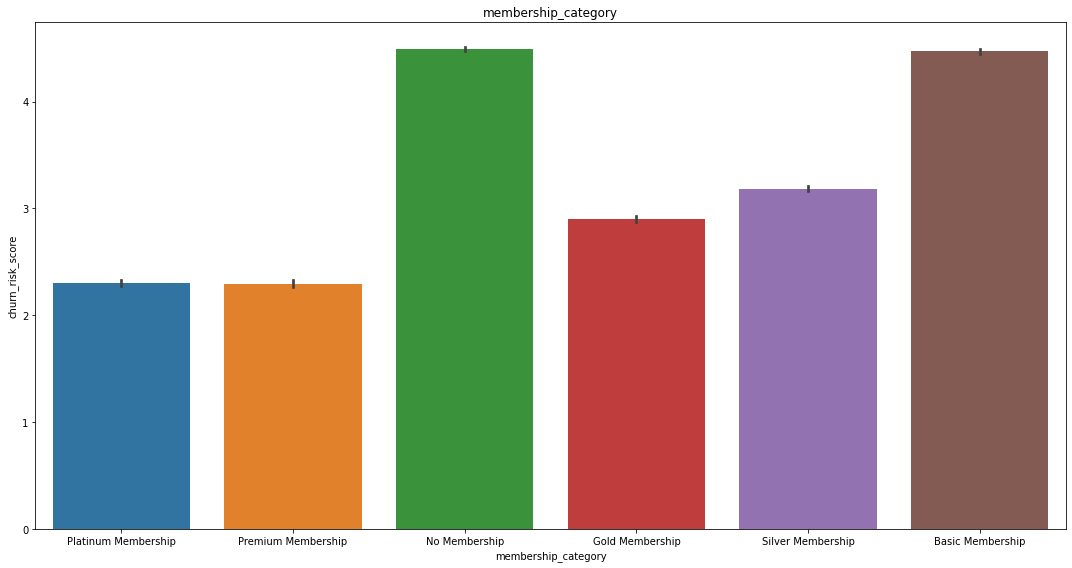

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='membership_category',y='churn_risk_score',data=train)
plt.xlabel('membership_category')
plt.ylabel('churn_risk_score')
plt.title('membership_category')
plt.tight_layout()
plt.show()

So customers with platinum,premium,gold membership have less cgurn_risk_score

In [20]:
train['feedback_length'] = train['feedback'].apply(len)
train['feedback_length']

0        24
1        21
2        12
3        12
4        12
         ..
36987    19
36988    21
36989    12
36990    19
36991    21
Name: feedback_length, Length: 36992, dtype: int64

In [21]:
print(train['feedback_length'].unique())

[24 21 12 19 20 16]


So we can see that there are just 5 unique lenghts in feedback

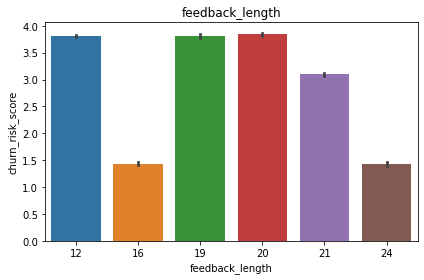

In [22]:
sns.barplot(x='feedback_length',y='churn_risk_score',data=train)
plt.xlabel('feedback_length')
plt.ylabel('churn_risk_score')
plt.title('feedback_length')
plt.tight_layout()
plt.show()

### We observe that:
1. Feedback length 16,24 have low churn_risk_scores
2. Feedback length 21 has a moderate churn_risk_score
3. Feedback length 12,19,20 have a very high churn_risk_score (probably complaint feedback)

Now lets check for outliers

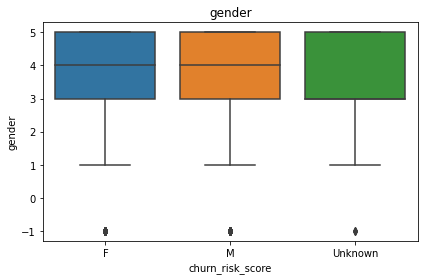

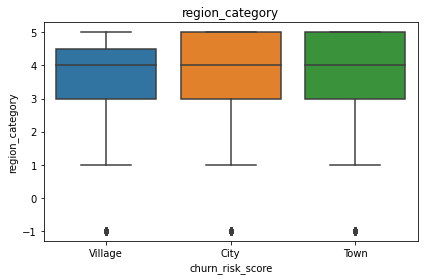

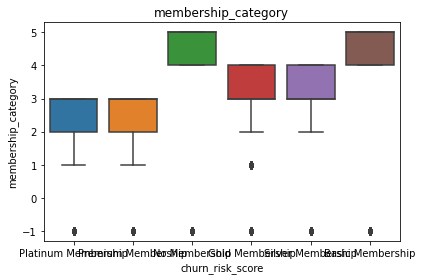

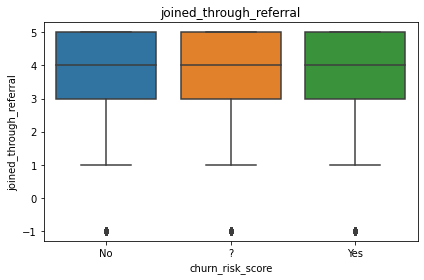

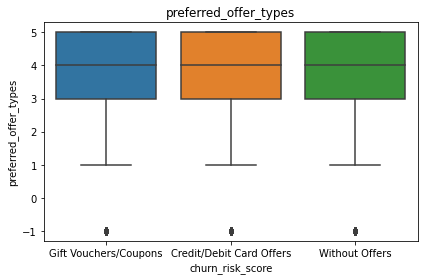

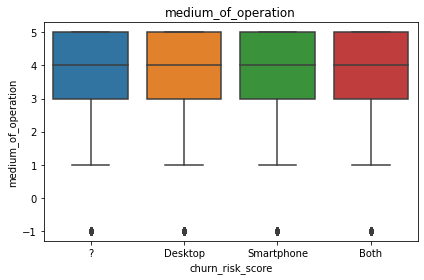

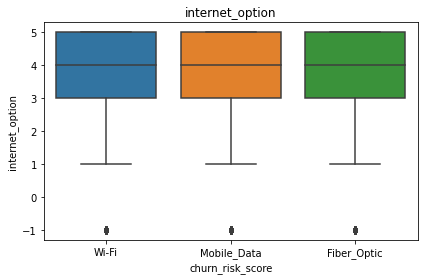

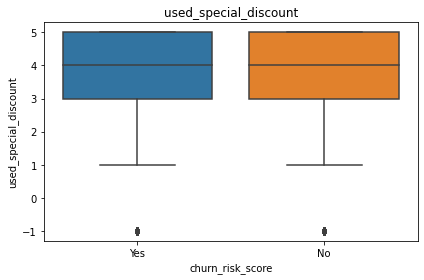

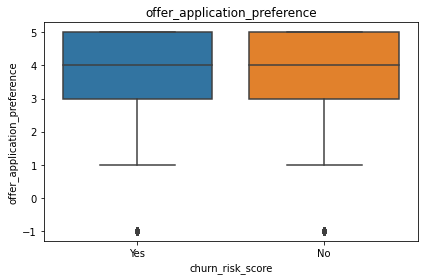

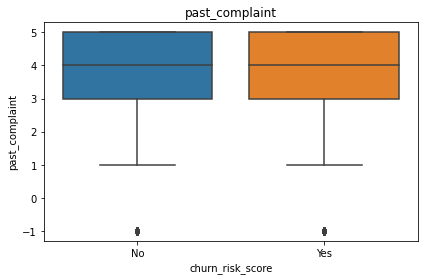

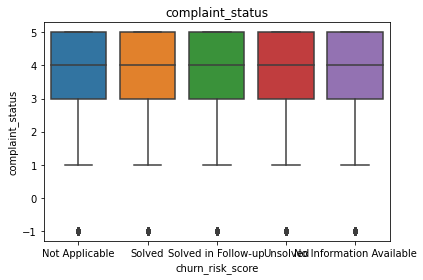

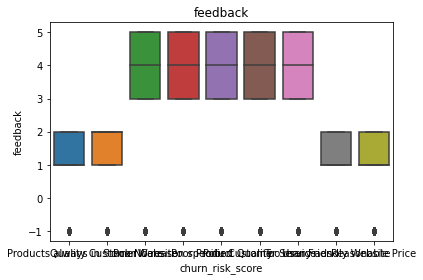

In [23]:
for feature in cat_features:
    if train[feature].nunique()<10:
        sns.boxplot(y="churn_risk_score",x=feature,data=train)
        plt.ylabel(feature)
        plt.xlabel('churn_risk_score')
        plt.title(feature)
        plt.tight_layout()
        plt.show()

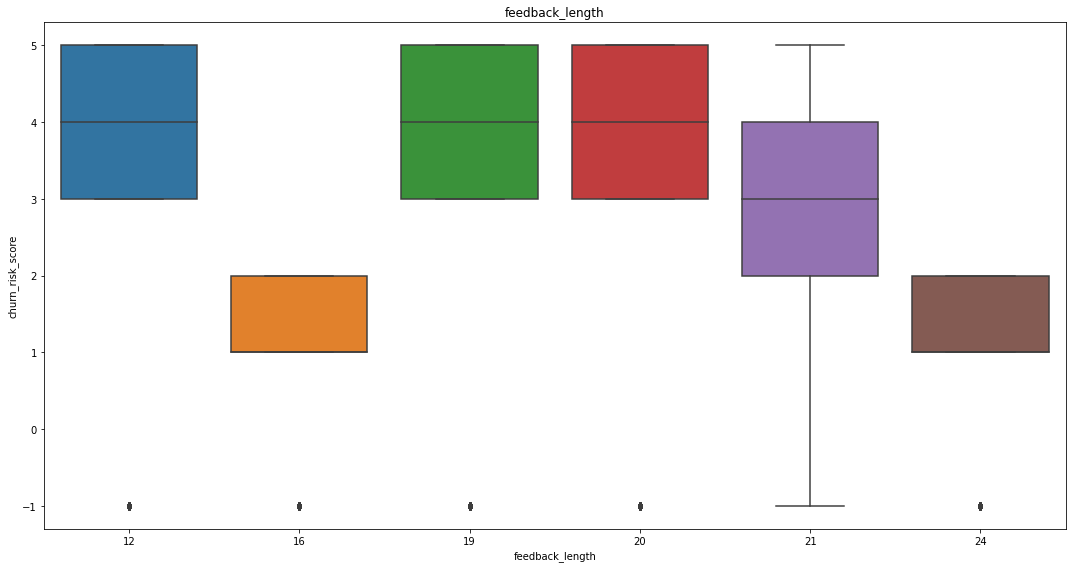

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x='feedback_length',y='churn_risk_score',data=train)
plt.xlabel('feedback_length')
plt.ylabel('churn_risk_score')
plt.title('feedback_length')
plt.tight_layout()
plt.show()

Lets explore the two features with 1000+ unique values

In [25]:
train[['joining_date','avg_frequency_login_days']].head()

,joining_date,avg_frequency_login_days
0,2017-08-17,17.0
1,2017-08-28,10.0
2,2016-11-11,22.0
3,2016-10-29,6.0
4,2017-09-12,16.0


There's not much we can do about joining date 

Lets create bands for avg_frequency_login_days

In [26]:
train[train['avg_frequency_login_days']=='Error']['avg_frequency_login_days']

39       Error
44       Error
45       Error
48       Error
50       Error
         ...  
36960    Error
36962    Error
36971    Error
36989    Error
36991    Error
Name: avg_frequency_login_days, Length: 3522, dtype: object

As we can see there are some error terms in avg_freq feature once we deal with them we can use this feature as a numerical feature <br>(will be dealt in feature engineering)

<AxesSubplot:>

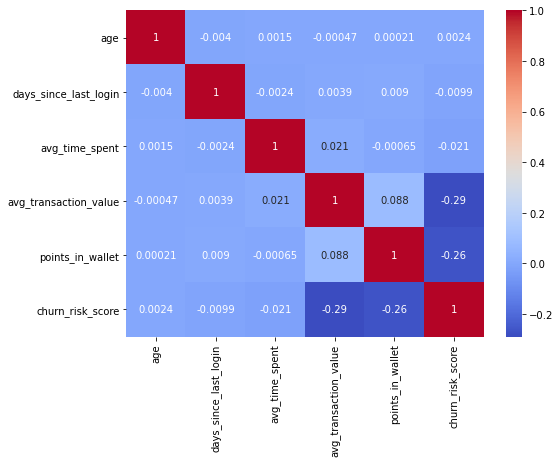

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(train[num_features].corr(),cmap='coolwarm',annot=True)

1. Negative corr means with increase in one value other decreases and vice versa
2. Positive corr means with increase in one value other increases and vice versa

# Feature Engineering

In [112]:
train_test_dataset = [train,test]
for data in train_test_dataset:
    print(data.shape)

(36992, 43)
(19919, 41)


Let's add feedback length in test

In [29]:
test['feedback_length'] = test['feedback'].apply(len)

### First lets impute nan values

In numerical feature 'points_in_wallet' had nan values

In [30]:
for data in train_test_dataset:
    print(data['points_in_wallet'].isnull().sum())

3443
1963


In [31]:
for data in train_test_dataset:
    data['points_in_wallet'].fillna(data['points_in_wallet'].median(),inplace=True)

In [32]:
for data in train_test_dataset:
    print(data['points_in_wallet'].isnull().sum())

0
0


In categorical features 
1. region_category
2. preferred_offer_types 

In [33]:
for data in train_test_dataset:
    print(data['region_category'].isnull().sum())

5428
2948


In [34]:
train['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [35]:
def impute_region(cols):
    region_list=['Town','City']
    if pd.isnull(cols):
        return random.choice(region_list)
    return cols

In [36]:
for data in train_test_dataset:
    data['region_category'] = data['region_category'].apply(impute_region)
    print(data['region_category'].isnull().sum())

0
0


In [37]:
for data in train_test_dataset:
    print(data['preferred_offer_types'].isnull().sum())

288
159


In [38]:
train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [39]:
def impute_offer(cols):
    offer_list=['Gift Vouchers/Coupons','Credit/Debit Card Offers','Without Offers']
    if pd.isnull(cols):
        return random.choice(offer_list)
    return cols

In [40]:
for data in train_test_dataset:
    data['preferred_offer_types'] = data['preferred_offer_types'].apply(impute_offer)
    print(data['preferred_offer_types'].isnull().sum())

0
0


Now lets fix the 'Error' terms in avg_frequency_login_days  (check eda)

In [41]:
train['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.84931675504866         1
-1.3902979570070144       1
3.736415849077286         1
-20.369213856486944       1
-10.521635947870834       1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [42]:
train[train['avg_frequency_login_days']!='Error']['avg_frequency_login_days'].dtype

dtype('O')

Lets first covert the numerical terms to int/float

In [43]:
mean=train[train['avg_frequency_login_days']!='Error']['avg_frequency_login_days'].apply(float).mean()

Now we have the mean and median so lets impute Error

In [44]:
def impute_avg_freq(cols):
    
    L=[14.0,15.0,16.0,mean]
    if cols=='Error':
        return random.choice(L)
    else:
        return cols

In [45]:
for data in train_test_dataset:
    data['avg_frequency_login_days'] = data['avg_frequency_login_days'].apply(impute_avg_freq)

In [46]:
train['avg_frequency_login_days'].value_counts()

13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
17.0                   1349
                       ... 
42.55424780293116         1
28.84931675504866         1
-1.3902979570070144       1
3.736415849077286         1
-10.521635947870834       1
Name: avg_frequency_login_days, Length: 1657, dtype: int64

In [47]:
for data in train_test_dataset:
    data['avg_frequency_login_days'] = data['avg_frequency_login_days'].apply(float)


In [48]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,feedback_length
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,24
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,697.62,Yes,No,Yes,Solved,Quality Customer Care,1,21
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,12
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,12
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,12


In [49]:
num_features.append('avg_frequency_login_days')

In [50]:
cat_features.remove('avg_frequency_login_days')

### Numerical Features

In [51]:
train.groupby('age')['churn_risk_score'].mean()

age
10    3.491045
11    3.489297
12    3.444781
13    3.347095
14    3.537313
15    3.429892
16    3.420391
17    3.472914
18    3.372019
19    3.412121
20    3.482059
21    3.407837
22    3.494830
23    3.482810
24    3.489922
25    3.450394
26    3.552593
27    3.371775
28    3.495677
29    3.480176
30    3.466948
31    3.500000
32    3.496350
33    3.431944
34    3.463873
35    3.532012
36    3.531437
37    3.513017
38    3.549020
39    3.454829
40    3.350318
41    3.390558
42    3.501397
43    3.517504
44    3.475038
45    3.398529
46    3.465390
47    3.460203
48    3.402941
49    3.454410
50    3.445122
51    3.415152
52    3.501488
53    3.440000
54    3.485197
55    3.398561
56    3.510264
57    3.444602
58    3.541298
59    3.489943
60    3.431818
61    3.461213
62    3.574594
63    3.382622
64    3.473214
Name: churn_risk_score, dtype: float64

In [52]:
data = train.copy()
data['age_band'] = pd.cut(data['age'],5)

In [53]:
data.groupby('age_band')['churn_risk_score'].mean()

age_band
(9.946, 20.8]    3.445725
(20.8, 31.6]     3.472120
(31.6, 42.4]     3.474642
(42.4, 53.2]     3.452168
(53.2, 64.0]     3.471862
Name: churn_risk_score, dtype: float64

The churn_risk_score nearly remains same for all age groups so it won't affect the target much

In [54]:
train['days_since_last_login'].value_counts()

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64

We must convert the -999 value into some reasonable value 
we will randomly assign values from the top 10 value_counts

In [55]:
def impute_login(cols):
    L=[8,9,10,11,12,13,14,15,16,17]
    if cols==-999:
        return random.choice(L)
    else:
        return cols

In [56]:
for data in train_test_dataset:
    data['days_since_last_login'] = data['days_since_last_login'].apply(impute_login)

In [57]:
for data in train_test_dataset:
    data['days_since_last_login'] = data['days_since_last_login'].apply(abs)
train['login_band'] = pd.cut(train['days_since_last_login'],5)

In [58]:
train.groupby('login_band')['churn_risk_score'].mean()

login_band
(0.975, 6.0]    3.382431
(6.0, 11.0]     3.476029
(11.0, 16.0]    3.463952
(16.0, 21.0]    3.491149
(21.0, 26.0]    3.506728
Name: churn_risk_score, dtype: float64

we can note that the churn_risk_score increases with increase in number of days since last login

In [59]:
for data in train_test_dataset:
    data.loc[data['days_since_last_login']<=6,'days_since_last_login']=0
    data.loc[(data['days_since_last_login']>6) & (data['days_since_last_login'] <=11),'days_since_last_login']=1
    data.loc[(data['days_since_last_login']>11) & (data['days_since_last_login'] <=16),'days_since_last_login']=2
    data.loc[(data['days_since_last_login']>16) & (data['days_since_last_login'] <=21),'days_since_last_login']=3
    data.loc[data['days_since_last_login']>21,'days_since_last_login']=4

In [60]:
test['days_since_last_login'].head()

0    2
1    1
2    3
3    2
4    0
Name: days_since_last_login, dtype: int64

In [61]:
data=train.copy()
data['band'] = pd.cut(data['avg_transaction_value'],5)
data.groupby('band')['churn_risk_score'].mean()

band
(701.346, 20623.178]      3.645075
(20623.178, 40445.896]    3.627664
(40445.896, 60268.614]    3.436718
(60268.614, 80091.332]    1.442699
(80091.332, 99914.05]     1.452462
Name: churn_risk_score, dtype: float64

So we can observe that a high avg_transaction_value indicates a very less churn_risk_score

In [62]:
for data in train_test_dataset:
    data.loc[data['avg_transaction_value']<=20623,'avg_transaction_value']=0
    data.loc[(data['avg_transaction_value']>20623) & (data['avg_transaction_value']<=40445),'avg_transaction_value']=1
    data.loc[(data['avg_transaction_value']>40445) & (data['avg_transaction_value']<=60268),'avg_transaction_value']=2
    data.loc[(data['avg_transaction_value']>60268) & (data['avg_transaction_value']<=80091),'avg_transaction_value']=3
    data.loc[data['avg_transaction_value']>80091,'avg_transaction_value']=4

In [63]:
train['avg_transaction_value'].value_counts()

0.0    13755
1.0    13700
2.0     7277
4.0     1178
3.0     1082
Name: avg_transaction_value, dtype: int64

In [64]:
data=train.copy()
data['band'] = pd.cut(data['points_in_wallet'],5)
data.groupby('band')['churn_risk_score'].mean()

band
(-763.491, -194.715]    4.280000
(-194.715, 371.231]     3.752923
(371.231, 937.177]      3.454050
(937.177, 1503.124]     3.344349
(1503.124, 2069.07]     3.185185
Name: churn_risk_score, dtype: float64

We observe that as points in wallet increases churn_risk_score decreases

In [65]:
for data in train_test_dataset:
    data.loc[data['points_in_wallet']<=-195,'points_in_wallet']=0
    data.loc[(data['points_in_wallet']>-195) & (data['points_in_wallet']<=371),'points_in_wallet']=1
    data.loc[(data['points_in_wallet']>371) & (data['points_in_wallet']<=938),'points_in_wallet']=2
    data.loc[(data['points_in_wallet']>938) & (data['points_in_wallet']<=1503),'points_in_wallet']=3
    data.loc[data['points_in_wallet']>1503,'points_in_wallet']=4

In [66]:
train['points_in_wallet'].value_counts()

2.0    32479
3.0     2444
1.0     2015
4.0       54
Name: points_in_wallet, dtype: int64

In [67]:
data = train.copy()
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].apply(abs)
data['band'] = pd.cut(data['avg_frequency_login_days'],5)
data.groupby('band')['churn_risk_score'].mean()

band
(-0.0668, 14.617]    3.252849
(14.617, 29.229]     3.624284
(29.229, 43.84]      3.360248
(43.84, 58.451]      3.778947
(58.451, 73.062]     3.333333
Name: churn_risk_score, dtype: float64

In [68]:
for data in train_test_dataset:
    data['avg_frequency_login_days'] = data['avg_frequency_login_days'].apply(abs)

In [69]:
train[num_features].head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,avg_frequency_login_days
0,18,3,300.63,2.0,2.0,2,17.0
1,32,2,306.34,0.0,2.0,1,10.0
2,44,2,516.16,1.0,2.0,5,22.0
3,37,1,53.27,1.0,2.0,5,6.0
4,31,3,113.13,1.0,2.0,5,16.0


### Categorical features

In [70]:
cat_features_label = [feature for feature in cat_features if train[feature].nunique()<=3]
cat_features_label

['gender',
 'region_category',
 'joined_through_referral',
 'preferred_offer_types',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint']

We will be creating dummies for this variables 

In [71]:
data=train.copy()
for feature in cat_features_label:
    dummy = pd.get_dummies(train[feature],drop_first=True,prefix=feature+'_')
    data = pd.concat([data,dummy],axis=1)

In [72]:
data.drop(train.columns,axis=1,inplace=True)

In [73]:
data.head()

,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes
0,0,0,0,1,1,0,1,0,0,1,1,1,0
1,0,0,0,0,0,0,1,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0,0,1,0,1,1
3,1,0,0,0,0,1,1,0,1,0,0,1,1
4,0,0,0,0,1,0,0,0,1,0,0,1,1


now lets concatenate them with our train dataset

In [74]:
train = pd.concat([train,data],axis=1)

In [75]:
train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'feedback_length', 'login_band',
       'gender__M', 'gender__Unknown', 'region_category__Town',
       'region_category__Village', 'joined_through_referral__No',
       'joined_through_referral__Yes',
       'preferred_offer_types__Gift Vouchers/Coupons',
       'preferred_offer_types__Without Offers', 'internet_option__Mobile_Data',
       'internet_option__Wi-Fi', 'used_special_discount__Yes',
       'offer_application_preference__Yes', 'past_complaint_

In [76]:
data=test.copy()
for feature in cat_features_label:
    dummy = pd.get_dummies(test[feature],drop_first=True,prefix=feature+'_')
    data = pd.concat([data,dummy],axis=1)

In [77]:
data.drop(test.columns,axis=1,inplace=True)

In [78]:
data.head()

,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes
0,0,0,0,1,1,0,0,1,0,1,1,0,0
1,1,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,1,0,1,0,1,0,1
3,1,0,1,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,1,1,0,0,1,1


In [79]:
test = pd.concat([test,data],axis=1)

In [80]:
test.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'feedback_length', 'gender__M', 'gender__Unknown',
       'region_category__Town', 'region_category__Village',
       'joined_through_referral__No', 'joined_through_referral__Yes',
       'preferred_offer_types__Gift Vouchers/Coupons',
       'preferred_offer_types__Without Offers', 'internet_option__Mobile_Data',
       'internet_option__Wi-Fi', 'used_special_discount__Yes',
       'offer_application_preference__Yes', 'past_complaint__Yes'],
      dtype='object')

Now lets handel the ordina features 

It is ordinal or, in other words, order categorical feature. This basically means that it is ordered in some meaningful way. For example, if the first class was more expensive than the second, or the more the first should be more expensive than the third.

In [81]:
cat_ordinal = [feature for feature in cat_features if train[feature].nunique()<12 and feature not in cat_features_label]
cat_ordinal

['membership_category', 'medium_of_operation', 'complaint_status', 'feedback']

now lets replace feedback with feedback_length the attribute that we created

In [82]:
cat_ordinal.pop(-1)

'feedback'

In [83]:
cat_ordinal.append('feedback_length')

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()

In [103]:
for data in train_test_dataset:
    for feature in cat_ordinal:
        data[feature] = le.fit_transform(data[feature])

In [104]:
test[cat_ordinal].head()

,membership_category,medium_of_operation,complaint_status,feedback_length
0,4,3,1,3
1,1,2,1,0
2,5,1,3,2
3,5,0,0,0
4,2,3,3,0


In [88]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,feedback_length,login_band,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,3,300.63,2.0,17.0,2.0,Yes,Yes,No,Not Applicable,Products always in Stock,2,24,"(16.0, 21.0]",0,0,0,1,1,0,1,0,0,1,1,1,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,2,306.34,0.0,10.0,2.0,Yes,No,Yes,Solved,Quality Customer Care,1,21,"(11.0, 16.0]",0,0,0,0,0,0,1,0,1,0,1,0,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,2,516.16,1.0,22.0,2.0,No,Yes,Yes,Solved in Follow-up,Poor Website,5,12,"(11.0, 16.0]",0,0,1,0,0,1,1,0,0,1,0,1,1
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,1,53.27,1.0,6.0,2.0,No,Yes,Yes,Unsolved,Poor Website,5,12,"(6.0, 11.0]",1,0,0,0,0,1,1,0,1,0,0,1,1
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,3,113.13,1.0,16.0,2.0,No,Yes,Yes,Solved,Poor Website,5,12,"(16.0, 21.0]",0,0,0,0,1,0,0,0,1,0,0,1,1


Now next step is to scale the data which is not in a normal distribution

Now we need to manually check which columns to include for scaling

In [89]:
scale_features =['age','avg_time_spent','avg_frequency_login_days']

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(train[scale_features])

MinMaxScaler()

In [93]:
train_features = pd.DataFrame(scaler.transform(train[scale_features]),columns=scale_features)

In [94]:
train_features.head()

,age,avg_time_spent,avg_frequency_login_days
0,0.148148,0.514859,0.232614
1,0.407407,0.515803,0.136797
2,0.629630,0.550486,0.301055
3,0.500000,0.473971,0.082044
4,0.388889,0.483866,0.218926


In [95]:
scaler = MinMaxScaler()

In [96]:
scaler.fit(test[scale_features])

MinMaxScaler()

In [97]:
test_features = pd.DataFrame(scaler.transform(test[scale_features]),columns=scale_features)

In [133]:
test_features.head()

,age,avg_time_spent,avg_frequency_login_days
0,0.740741,0.464132,0.087778
1,0.574074,0.401129,0.112953
2,0.388889,0.433233,0.264004
3,1.000000,0.402353,0.138128
4,0.111111,0.457554,0.100365


In [99]:
train = pd.concat([train,train_features],axis=1)
test = pd.concat([test,test_features],axis=1)

In [105]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,feedback_length,login_band,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes,age,avg_time_spent,avg_frequency_login_days
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,3,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,0,Wi-Fi,16:08:02,3,300.63,2.0,17.0,2.0,Yes,Yes,No,1,Products always in Stock,2,5,"(16.0, 21.0]",0,0,0,1,1,0,1,0,0,1,1,1,0,0.148148,0.514859,0.232614
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,4,2017-08-28,?,CID21329,Gift Vouchers/Coupons,2,Mobile_Data,12:38:13,2,306.34,0.0,10.0,2.0,Yes,No,Yes,2,Quality Customer Care,1,4,"(11.0, 16.0]",0,0,0,0,0,0,1,0,1,0,1,0,1,0.407407,0.515803,0.136797
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,2,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,2,Wi-Fi,22:53:21,2,516.16,1.0,22.0,2.0,No,Yes,Yes,3,Poor Website,5,0,"(11.0, 16.0]",0,0,1,0,0,1,1,0,0,1,0,1,1,0.629630,0.550486,0.301055
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,2,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,2,Mobile_Data,15:57:50,1,53.27,1.0,6.0,2.0,No,Yes,Yes,4,Poor Website,5,0,"(6.0, 11.0]",1,0,0,0,0,1,1,0,1,0,0,1,1,0.500000,0.473971,0.082044
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,2,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,3,Mobile_Data,15:46:44,3,113.13,1.0,16.0,2.0,No,Yes,Yes,2,Poor Website,5,0,"(16.0, 21.0]",0,0,0,0,1,0,0,0,1,0,0,1,1,0.388889,0.483866,0.218926


### Now our data is ready next we'll be doing feature selection and pass those to ML models

In [106]:
test.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'feedback_length', 'gender__M', 'gender__Unknown',
       'region_category__Town', 'region_category__Village',
       'joined_through_referral__No', 'joined_through_referral__Yes',
       'preferred_offer_types__Gift Vouchers/Coupons',
       'preferred_offer_types__Without Offers', 'internet_option__Mobile_Data',
       'internet_option__Wi-Fi', 'used_special_discount__Yes',
       'offer_application_preference__Yes', 'past_complaint__Yes', 'age',
       'avg_time_spent', 'a

## Feature Selection

Lets drop the features we won't be using

In [126]:
drop_list = ['Name', 'age', 'gender', 'security_no',
       'region_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types', 
        'internet_option', 'last_visit_time','avg_time_spent',
       'avg_frequency_login_days','used_special_discount',
       'offer_application_preference','past_complaint',
       'feedback']

In [129]:
for data in train_test_dataset:
    data.drop(drop_list,axis=1,inplace=True)

In [131]:
train.drop('login_band',axis=1,inplace=True)

In [134]:
train = pd.concat([train,train_features],axis=1)
test = pd.concat([test,test_features],axis=1)

In [135]:
train.head()

,customer_id,membership_category,medium_of_operation,days_since_last_login,avg_transaction_value,points_in_wallet,complaint_status,churn_risk_score,feedback_length,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes,age,avg_time_spent,avg_frequency_login_days
0,fffe4300490044003600300030003800,3,0,3,2.0,2.0,1,2,5,0,0,0,1,1,0,1,0,0,1,1,1,0,0.148148,0.514859,0.232614
1,fffe43004900440032003100300035003700,4,2,2,0.0,2.0,2,1,4,0,0,0,0,0,0,1,0,1,0,1,0,1,0.407407,0.515803,0.136797
2,fffe4300490044003100390032003600,2,2,2,1.0,2.0,3,5,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0.629630,0.550486,0.301055
3,fffe43004900440036003000330031003600,2,2,1,1.0,2.0,4,5,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0.500000,0.473971,0.082044
4,fffe43004900440031003900350030003600,2,3,3,1.0,2.0,2,5,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0.388889,0.483866,0.218926


In [136]:
test.head()

,customer_id,membership_category,medium_of_operation,days_since_last_login,avg_transaction_value,points_in_wallet,complaint_status,feedback_length,gender__M,gender__Unknown,region_category__Town,region_category__Village,joined_through_referral__No,joined_through_referral__Yes,preferred_offer_types__Gift Vouchers/Coupons,preferred_offer_types__Without Offers,internet_option__Mobile_Data,internet_option__Wi-Fi,used_special_discount__Yes,offer_application_preference__Yes,past_complaint__Yes,age,avg_time_spent,avg_frequency_login_days
0,fffe43004900440031003700300030003400,4,3,2,2.0,2.0,1,3,0,0,0,1,1,0,0,1,0,1,1,0,0,0.740741,0.464132,0.087778
1,fffe43004900440031003900370037003300,1,2,1,0.0,2.0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0.574074,0.401129,0.112953
2,fffe43004900440034003800360037003000,5,1,3,0.0,2.0,3,2,0,0,1,0,1,0,1,0,1,0,1,0,1,0.388889,0.433233,0.264004
3,fffe43004900440036003200370033003400,5,0,2,1.0,2.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1.000000,0.402353,0.138128
4,fffe43004900440035003000370031003900,2,3,0,2.0,1.0,3,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0.111111,0.457554,0.100365


## TrainTest split and Model selection

In [137]:
from sklearn.model_selection import train_test_split

In [231]:
X=train.drop(['customer_id','churn_risk_score'],axis=1)
y=train['churn_risk_score'].apply(abs)
X_TEST = test.drop('customer_id',axis=1)

In [232]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Models

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [234]:
model_params={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'parameters':{
            'criterion':['gini','entropy']
        }
    },
    'RandomForestClassifier':{
        'model': RandomForestClassifier(),
        'parameters': {
            'n_estimators':[10,30,50,100,200,300]
        }
    },

}

In [235]:
score =[]
for model,param in model_params.items():
    grid = GridSearchCV(param['model'],param['parameters'],return_train_score=False)
    grid.fit(X_train,y_train)
    score.append(
    {   'model':model,
        'best_score':grid.best_score_,
        'best_params':grid.best_params_
    })

In [236]:
pd.DataFrame(score).dropna().set_index('model')

,best_score,best_params
model,,
DecisionTreeClassifier,0.544953,{'criterion': 'entropy'}
RandomForestClassifier,0.603383,{'n_estimators': 300}


So here we see that RandomForestClassifier gives the highest score

In [237]:
model = RandomForestClassifier(n_estimators=300)

In [238]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [239]:
pred = model.predict(X_test)

In [240]:
from sklearn.metrics import classification_report,confusion_matrix

In [241]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.55      0.40      0.47      1124
           2       0.62      0.29      0.40       836
           3       0.65      0.74      0.69      3098
           4       0.41      0.26      0.32      3054
           5       0.64      0.95      0.76      2986

    accuracy                           0.59     11098
   macro avg       0.57      0.53      0.53     11098
weighted avg       0.57      0.59      0.56     11098



In [242]:
confusion_matrix(y_test,pred)

array([[ 452,  136,  286,  120,  130],
       [ 335,  246,  179,   76,    0],
       [  24,    6, 2289,  779,    0],
       [   4,    6,  774,  784, 1486],
       [   0,    0,    0,  163, 2823]])

In [243]:
model.fit(X,y)

RandomForestClassifier(n_estimators=300)

In [244]:
pred_test = model.predict(X_TEST)

In [245]:
df = pd.DataFrame()

In [246]:
df['customer_id']=test['customer_id']
df['churn_risk_score']=pred_test

In [247]:
df.set_index('customer_id',inplace=True)

In [248]:
df.head()

,churn_risk_score
customer_id,
fffe43004900440031003700300030003400,3
fffe43004900440031003900370037003300,3
fffe43004900440034003800360037003000,4
fffe43004900440036003200370033003400,4
fffe43004900440035003000370031003900,5


In [249]:
#df.to_csv("submission1.csv")